In [63]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
data = pd.read_csv("data/articulos_ml.csv")

In [65]:
data.shape

(161, 8)

In [66]:
data.head()


,Title,url,Word count,# of Links,# of comments,# Images video,Elapsed days,# Shares
0,What is Machine Learning and how do we use it ...,https://blog.signals.network/what-is-machine-l...,1888,1,2.0,2,34,200000
1,10 Companies Using Machine Learning in Cool Ways,NaN,1742,9,NaN,9,5,25000
2,How Artificial Intelligence Is Revolutionizing...,NaN,962,6,0.0,1,10,42000
3,Dbrain and the Blockchain of Artificial Intell...,NaN,1221,3,NaN,2,68,200000
4,Nasa finds entire solar system filled with eig...,NaN,2039,1,104.0,4,131,200000


In [67]:
data.describe()

,Word count,# of Links,# of comments,# Images video,Elapsed days,# Shares
count,161.000000,161.000000,129.000000,161.000000,161.000000,161.000000
mean,1808.260870,9.739130,8.782946,3.670807,98.124224,27948.347826
std,1141.919385,47.271625,13.142822,3.418290,114.337535,43408.006839
min,250.000000,0.000000,0.000000,1.000000,1.000000,0.000000
25%,990.000000,3.000000,2.000000,1.000000,31.000000,2800.000000
50%,1674.000000,5.000000,6.000000,3.000000,62.000000,16458.000000
75%,2369.000000,7.000000,12.000000,5.000000,124.000000,35691.000000
max,8401.000000,600.000000,104.000000,22.000000,1002.000000,350000.000000


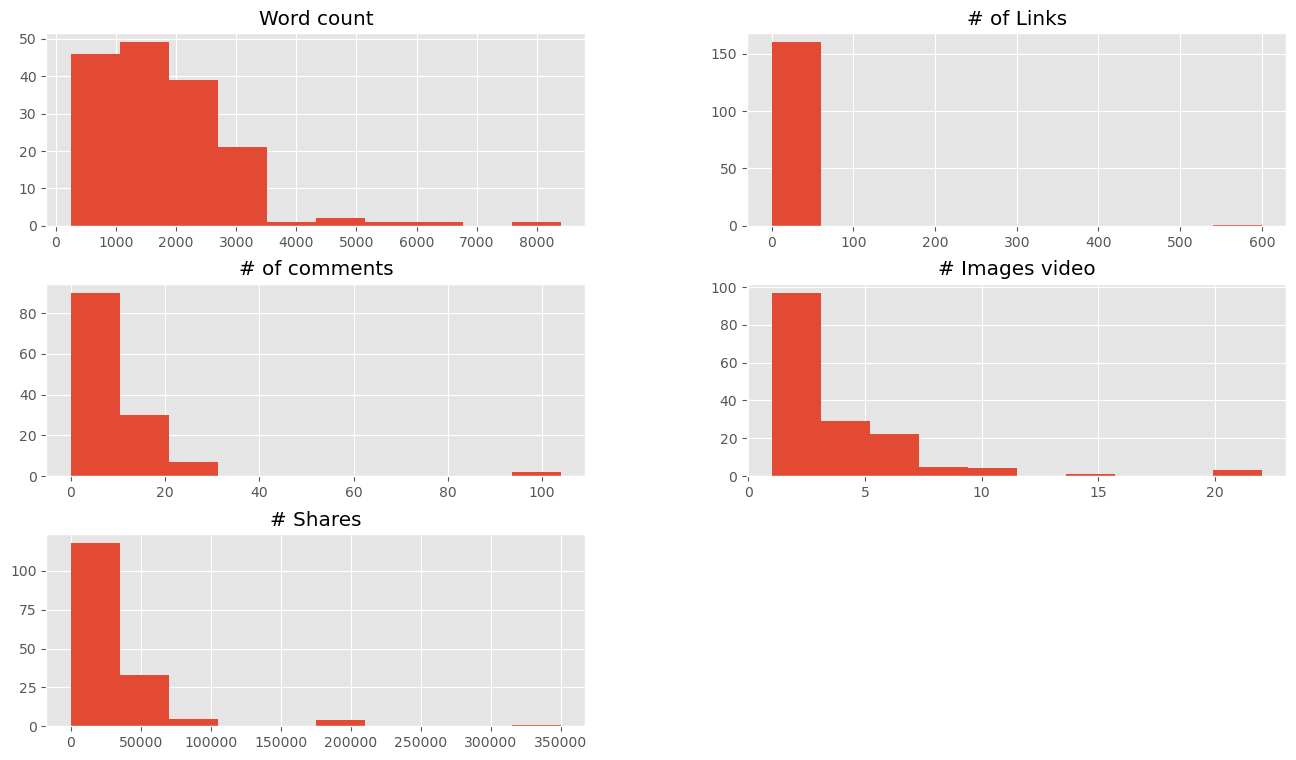

In [68]:
data.drop(['Title','url', 'Elapsed days'],axis=1).hist()
plt.show()

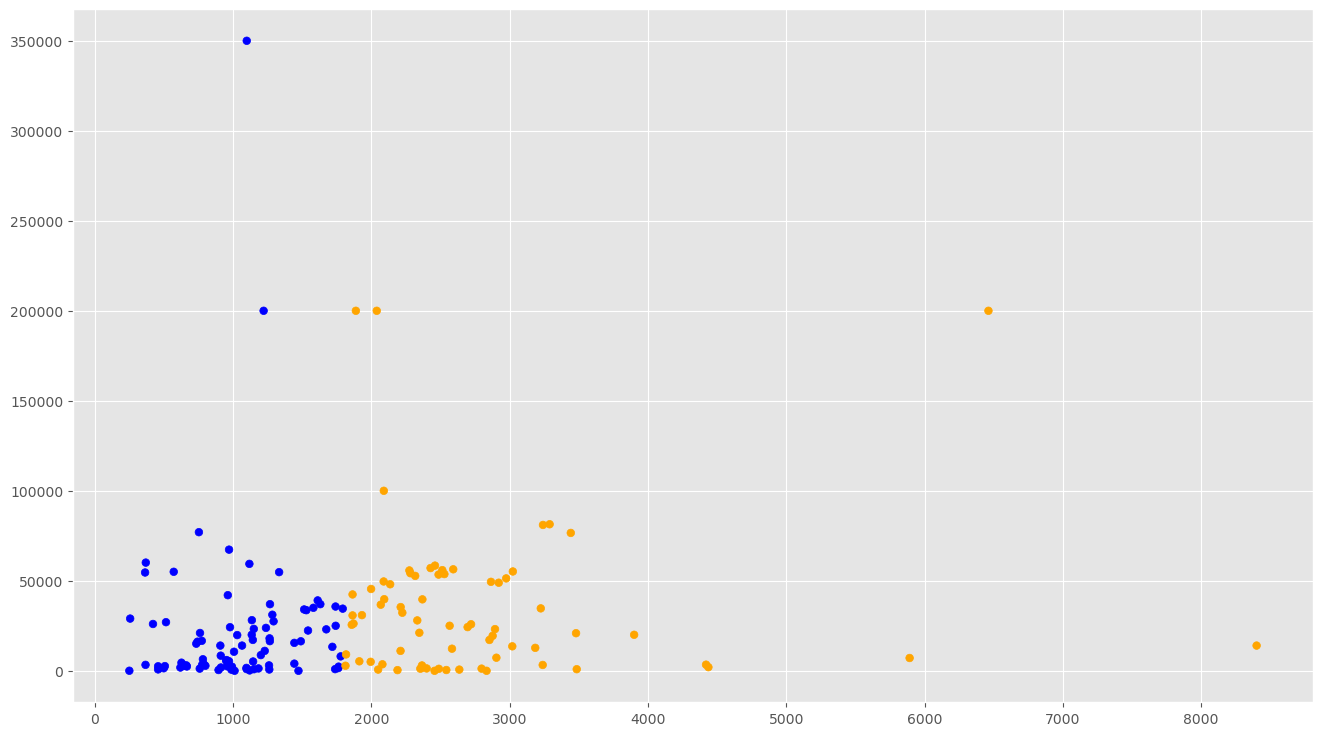

In [69]:
colores=['orange','blue']
tamanios=[30,60]
f1 = data['Word count'].values
f2 = data['# Shares'].values
asignar=[]
for index, row in data.iterrows():
    if(row['Word count']>1808):
        asignar.append(colores[0])
    else:
        asignar.append(colores[1])

plt.scatter(f1, f2, c=asignar, s=tamanios[0])
plt.show()

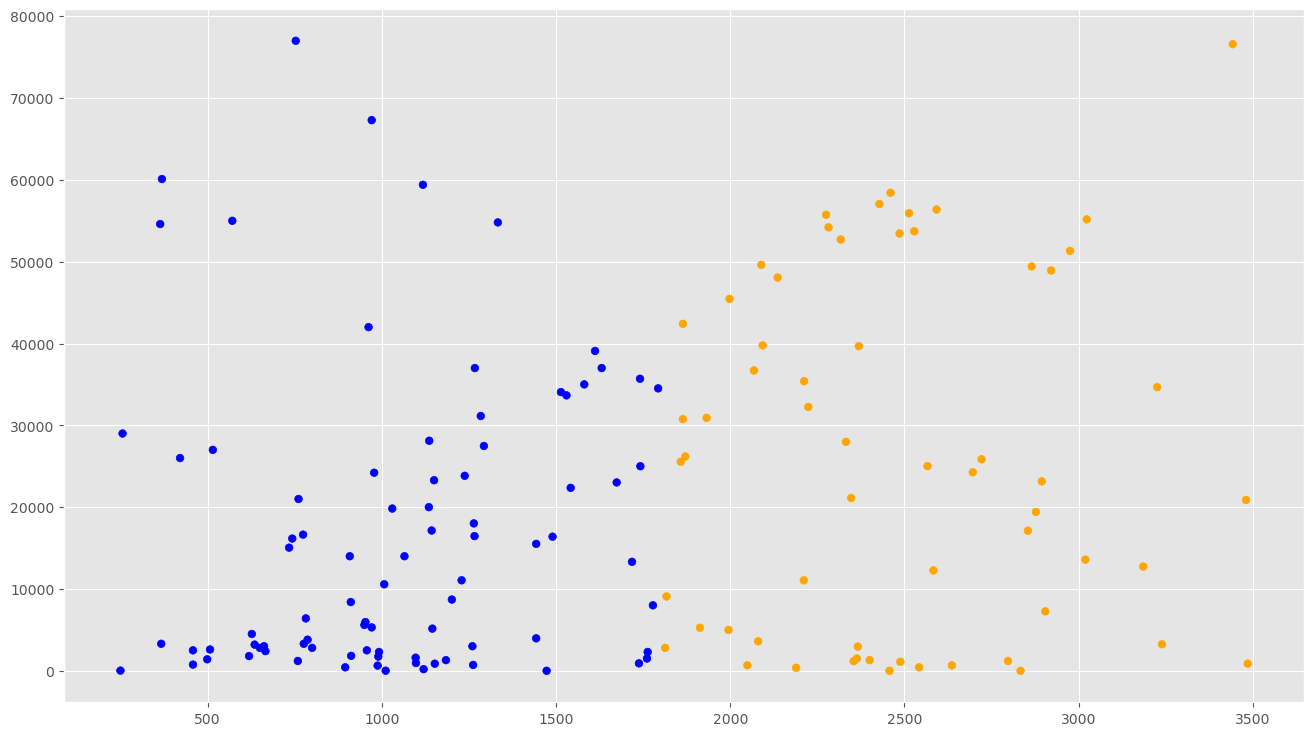

In [ ]:
filtered_data = data[(data['Word count'] <= 3500) & (data['# Shares'] <= 80000)]
f1 = filtered_data['Word count'].values
f2 = filtered_data['# Shares'].values
asignar=[]
for index, row in filtered_data.iterrows():
    if(row['Word count']>1808):
        asignar.append(colores[0])
    else:
        asignar.append(colores[1])

plt.scatter(f1, f2, c=asignar, s=tamanios[0])
plt.show()


In [71]:
filtered_data.describe()

,Word count,# of Links,# of comments,# Images video,Elapsed days,# Shares
count,148.000000,148.000000,121.000000,148.000000,148.000000,148.000000
mean,1640.209459,5.743243,7.256198,3.331081,91.554054,20545.648649
std,821.975365,6.064418,6.346297,2.706476,91.143923,19933.865031
min,250.000000,0.000000,0.000000,1.000000,1.000000,0.000000
25%,971.000000,3.000000,2.000000,1.000000,28.750000,2750.000000
50%,1536.000000,5.000000,6.000000,3.000000,60.000000,15836.000000
75%,2335.750000,7.000000,11.000000,4.000000,110.500000,34177.500000
max,3485.000000,49.000000,30.000000,22.000000,349.000000,77000.000000


In [72]:
dataX =filtered_data[["Word count"]]
X_train = np.array(dataX)
y_train = filtered_data['# Shares'].values

In [ ]:
regr = linear_model.LinearRegression()
regr.fit(X_train, y_train)
y_pred = regr.predict(X_train)
print('Coefficients: \n', regr.coef_)
print('Independent term: \n', regr.intercept_)
print("Mean squared error: %.2f" % mean_squared_error(y_train, y_pred))
print('Variance score: %.2f' % r2_score(y_train, y_pred))


Coefficients: 
 [5.69765366]
Independent term: 
 11200.303223074163
Mean squared error: 372888728.34
Variance score: 0.06


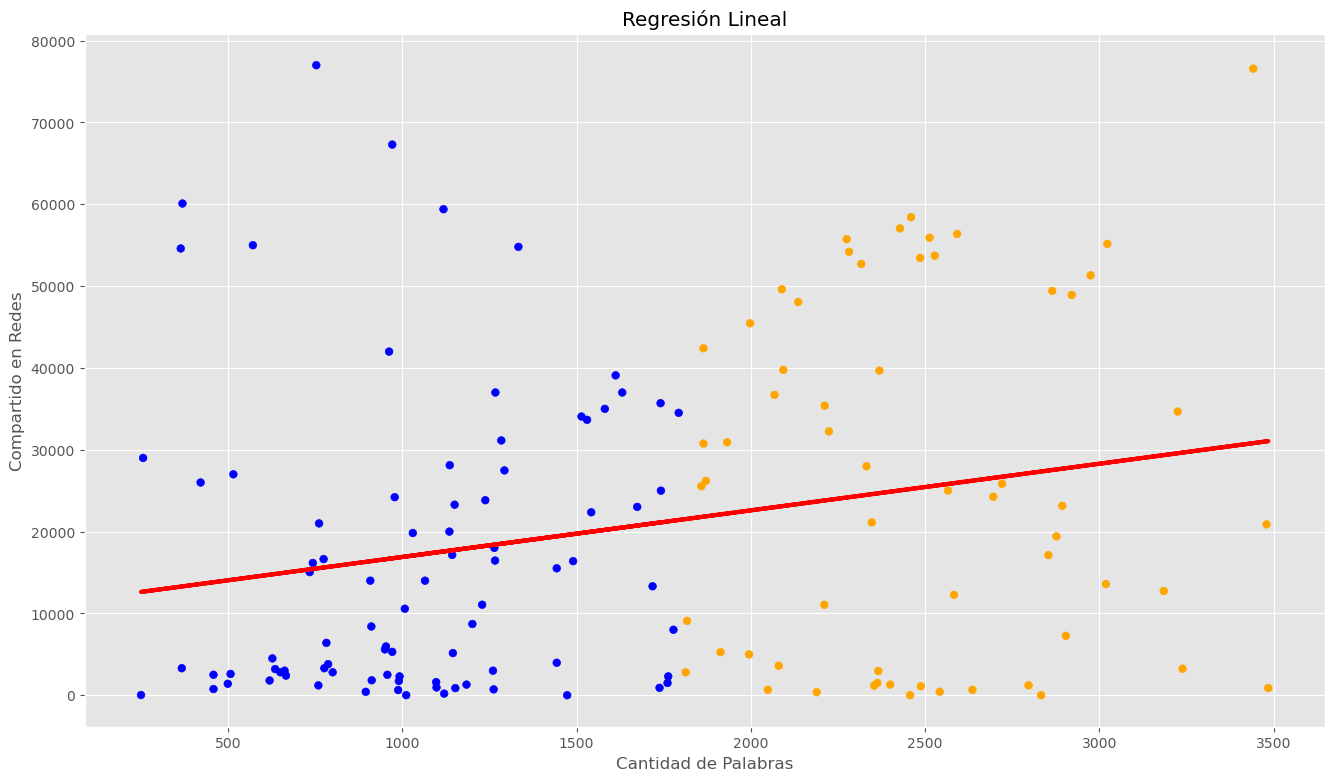

In [74]:
plt.scatter(X_train[:,0], y_train, c=asignar, s=tamanios[0])
plt.plot(X_train[:,0], y_pred, color='red', linewidth=3)
plt.xlabel('Cantidad de Palabras')
plt.ylabel('Compartido en Redes')
plt.title('Regresión Lineal')
plt.show()

In [75]:
y_Dosmil = regr.predict([[2000]])
print(int(y_Dosmil[0]))


22595


In [ ]:

suma = (filtered_data["# of Links"] + filtered_data['# of comments'].fillna(0) +
filtered_data['# Images video'])
dataX2 = pd.DataFrame()
dataX2["Word count"] = filtered_data["Word count"]
dataX2["suma"] = suma
XY_train = np.array(dataX2)
z_train = filtered_data['# Shares'].values


In [ ]:
regr2 = linear_model.LinearRegression()
regr2.fit(XY_train, z_train)
z_pred = regr2.predict(XY_train)
print('Coefficients: \n', regr2.coef_)
print("Mean squared error: %.2f" % mean_squared_error(z_train, z_pred))


Coefficients: 
 [   6.63216324 -483.40753769]
Mean squared error: 352122816.48


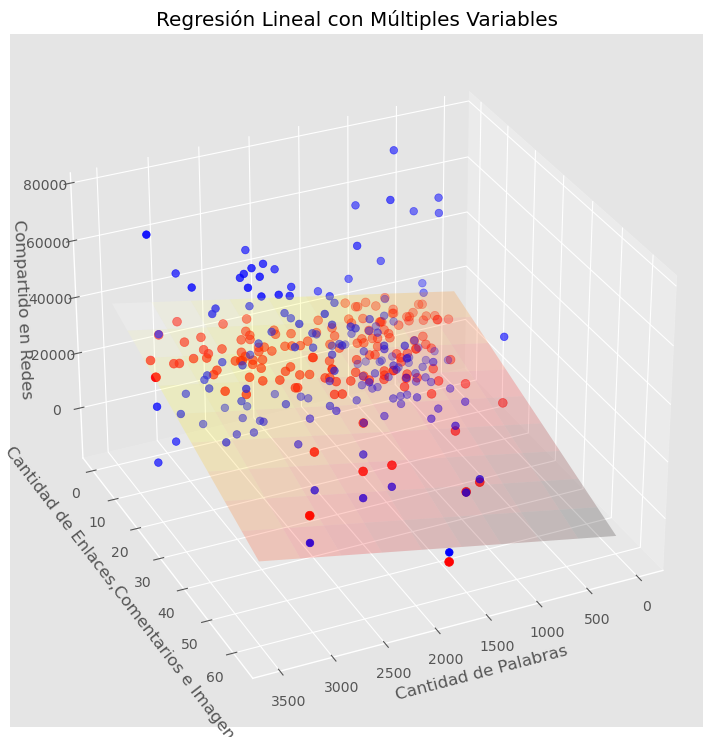

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
xx, yy = np.meshgrid(np.linspace(0, 3500, num=10), np.linspace(0, 60, num=10))
nuevoX = (regr2.coef_[0] * xx)
nuevoY = (regr2.coef_[1] * yy)
z = (nuevoX + nuevoY + regr2.intercept_)
ax.plot_surface(xx, yy, z, alpha=0.2, cmap='hot')
ax.scatter(XY_train[:, 0], XY_train[:, 1], z_train, c='blue',s=30)
ax.scatter(XY_train[:, 0], XY_train[:, 1], z_pred, c='red',s=40)
ax.view_init(elev=30., azim=65)

ax.set_xlabel('Cantidad de Palabras')
ax.set_ylabel('Cantidad de Enlaces,Comentarios e Imagenes')
ax.set_zlabel('Compartido en Redes')
ax.set_title('Regresión Lineal con Múltiples Variables')
plt.show()


In [79]:
z_Dosmil = regr2.predict([[2000, 10+4+6]])
print(int(z_Dosmil[0]))

20518


In [80]:
mejoraEnError = mean_squared_error(y_train, y_pred) - mean_squared_error(z_train, z_pred)
print(mejoraEnError)


20765911.860715985


In [81]:
mejoraEnVarianza = r2_score(z_train, z_pred) - r2_score(y_train, y_pred)
print(mejoraEnVarianza)

0.052615337462582956


In [82]:
diferenciaComparir = z_Dosmil - y_Dosmil
print(int(diferenciaComparir[0]))


-2077


Machine Learning. Descargar los archivos adjuntos y responder las siguientes preguntas
¿Por qué era importante evaluar si existe una relación entre la cantidad de palabras y la cantidad de shares de un artículo? ya que antes de construir un modelo es necesario verificar si la información que tenemos cuenta con relaciones entre la variable independiente en este caso conteo de palabras y la dependiente compartidos, si no hay relación el modelo de regresión no tendría sentido ya que no había información útil, para explicar o predecir.

Al analizar los histogramas iniciales, ¿qué patrones observaste en la distribución de palabras y shares?
Se observan distribuciones altamente sesgadas a la derecha, la mayoría de los artículos tienen pocas palabras. La mayoría tiene pocos shares, con algunos valores muy altos
¿Cómo influye esto en la selección del modelo?
nos dice que hay presencia de valores fuera de lo común y distribuciones no normales, lo que afecta al modelo debido a que la regresión lineal es sensible a valores fuera de lo común ya sea por muy altos o muy bajos, lo que provoca un ajuste poco eficiente.


¿Qué propósito tuvo filtrar los artículos con menos de 3500 palabras y menos de 80,000 shares? 
El filtrado elimina a los valores extremadamente atípicos, analiza el comportamiento del modelo en el rango en el que se concentra la mayoría de los datos.
¿Cómo cambió el comportamiento del modelo después del filtrado?
la nube de puntos se volvió más compacta, el modelo mostró un aumento pequeño en la R2, el error se redujo aunque sigue siendo elevado.


¿Por qué crees que había tanta concentración de puntos en estas zonas? ¿Cómo afecta esto al desempeño de la regresión lineal?
porque una gran cantidad de artículos tienen longitudes similares y así mismo no se vuelven super populares. Esto hace que haya una alta densidad de puntos en zonas bajas y hace que para la regresión lineal le sea más difícil capturar patrones claros. 


En el modelo de regresión simple, ¿qué significa la pendiente del modelo respecto a la relación Word Count → Shares? Explica en tus palabras.
La pendiente de 5.7 indica que por cada palabra extra, el modelo predice en promedio 5.7 compartidos más.


El error cuadrático medio (MSE) fue alto en el primer modelo. ¿Qué factores en los datos podrían explicar este resultado?

Debido a la alta dispersión de los datos, también hay que tomar en cuenta de que hay muchos artículos compartidos muy distintos aunque tengan palabras similares y por último la influencia de factores que no tomamos en cuenta como el tema, calidad, timing y audiencia.


Observa el R 2 obtenido: ¿Crees que la cantidad de palabras es un buen predictor de los shares? ¿Por qué sí o por qué no?

no ya que a que 0.06 indica que solo el 6% de la variabilidad de los shares se explica por el número de palabras, esto demuestra que el conteo de palabras no es un predictor fuerte, así mismo se requieren más variables para explicar la cantidad de compartidos.


En los gráficos que distinguen artículos por encima y por debajo de la media (1808 palabras), ¿qué diferencias observaste en la dispersión?

Los artículos más cortos con alta dispersión en compartidos, artículos más largos con dispersión similar, son una tendencia clara.


¿Te parece que la línea de regresión se ajusta bien a los datos? Argumenta basándose en la dispersión.

no, la línea atraviesa una nube muy dispersa, no sigue claramente la tendencia de los puntos, esto nos indica underfitting, así mismo que el modelo es demasiado simple para explicar el fenómeno

